<a href="https://colab.research.google.com/github/nitish-pandey/Image-ClassiFier-using-CNN-GTSRB/blob/main/GTSRB_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import random
import cv2 as cv

In [2]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

--2021-09-13 06:23:28--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  18.7MB/s    in 16s     

2021-09-13 06:23:45 (16.9 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]

--2021-09-13 06:23:45--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.8

In [ ]:
!unzip /content/GTSRB_Final_Test_Images.zip
!unzip /content/GTSRB_Final_Training_Images.zip

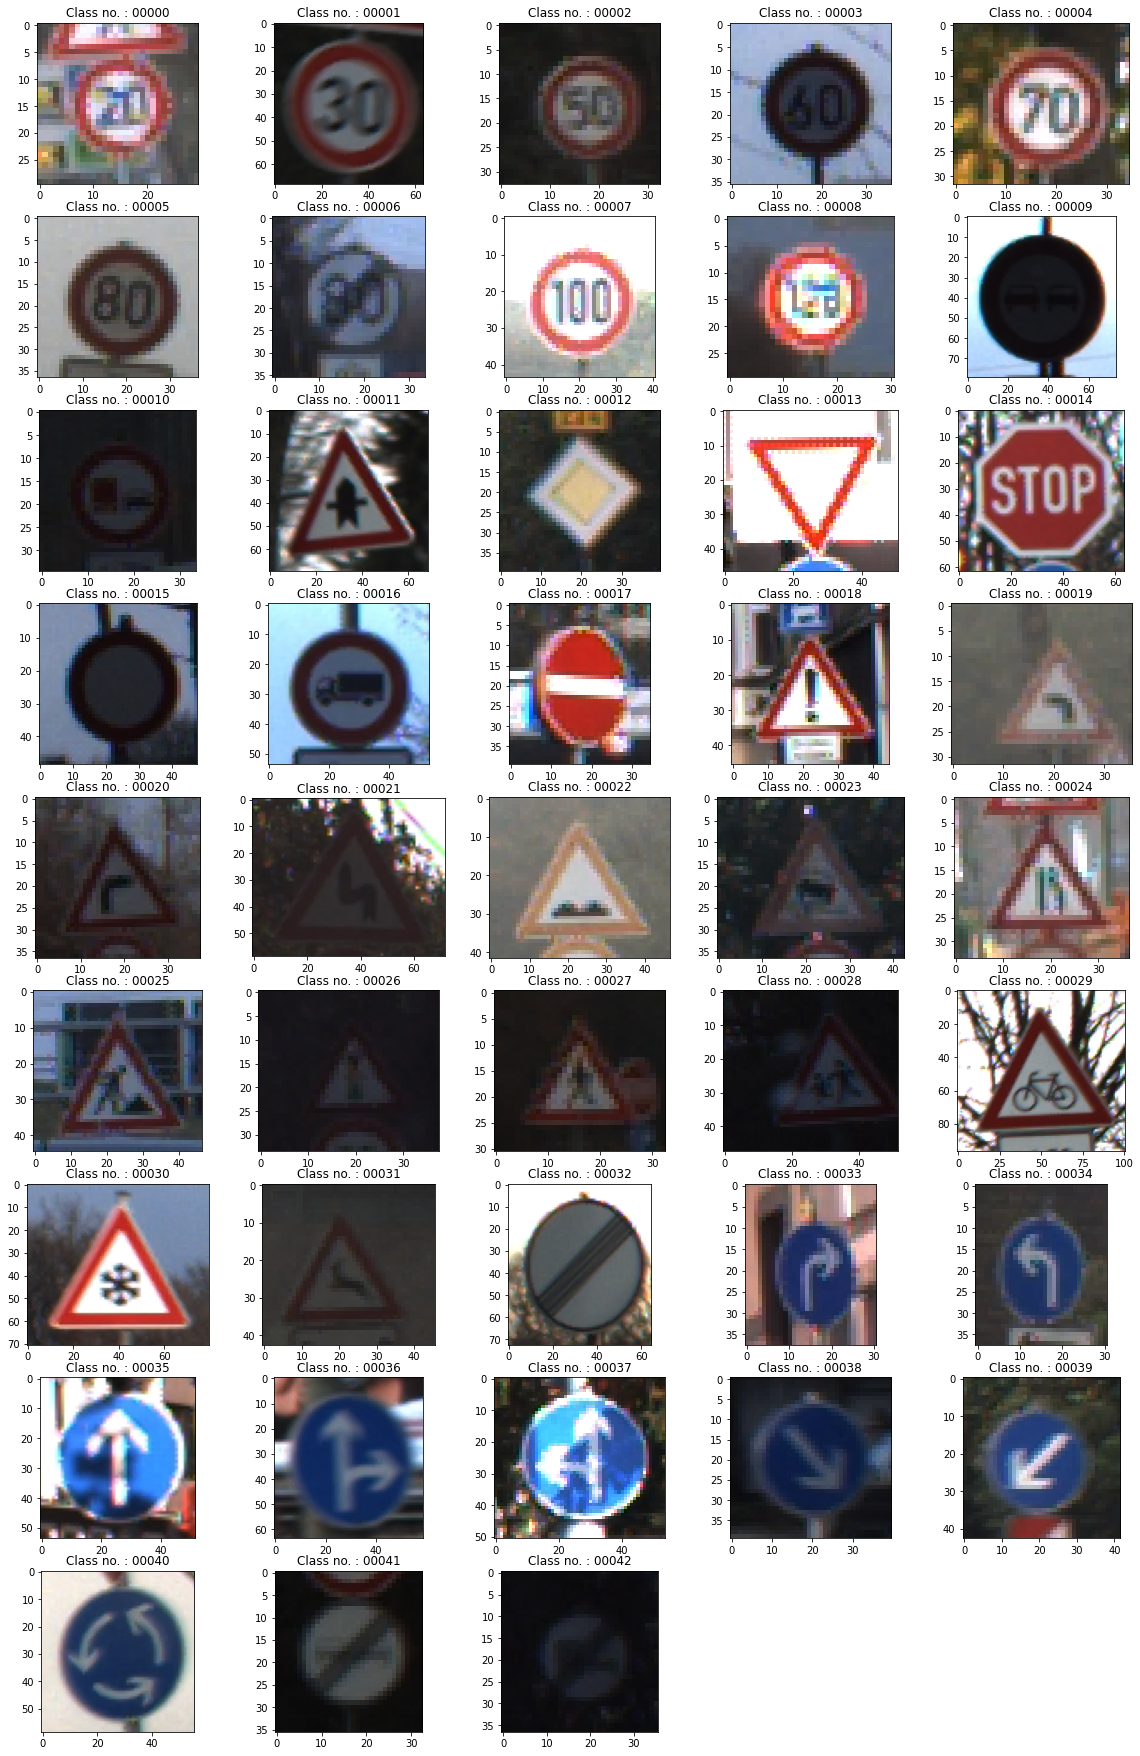

In [4]:
dir='GTSRB/Final_Training/Images/'
list=os.listdir(dir)
list=sorted(list)
plt.figure(figsize=(20,35))
i=0
for i in range(43):
    path='{}/{}'.format(dir,list[i])
    random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
    plt.subplot(10,5,i+1)
    random_filename='{}/{}/{}'.format(dir,list[i],random_filename)
    img=plt.imread(random_filename)
    plt.title('Class no. : {}'.format(list[i]))
    plt.imshow(img)

plt.savefig('img.png',dpi=400)
plt.show()

In [5]:
length=[]
height=[]
for i in range(43):
    path='/content/GTSRB/Final_Training/Images/{}'.format(list[i])
    length.append(len(os.listdir(path)))
    height.append(i)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


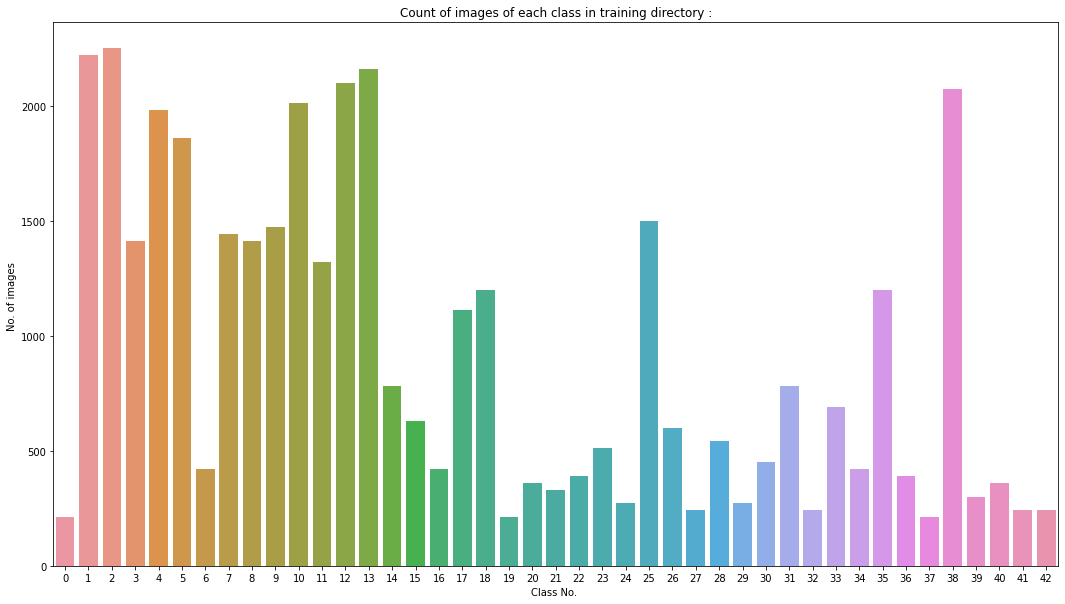

In [6]:
plt.figure(figsize=(18,10))
plt.title('Count of images of each class in training directory :')
plt.xlabel('Class No. ')
plt.ylabel('No. of images ')
sns.barplot(height,length)
plt.savefig('image.png',dpi=400)
plt.show()